In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
income_df = pd.read_csv("resources/income_median.csv")
rent_df = pd.read_csv("resources/rent_median.csv")
mortgage_df = pd.read_csv("resources/mortgage_median.csv")
perth_median_income_df= pd.read_csv("resources/greater_perth_income.csv")
unemployment_df = pd.read_csv("resources/unemployment_rate.csv")
unoccupied_df = pd.read_csv("resources/unoccupied_rate.csv")
building_df = pd.read_csv("resources/building_approval.csv")

In [3]:
perth_median_icnome = perth_median_income_df["Median"].values[0]

In [4]:
df_0 = pd.merge(income_df,rent_df,on="SA2 Name", how="inner")
df_1 = pd.merge(df_0, mortgage_df, on="SA2 Name", how="inner") 
df_2 = pd.merge(df_1, unemployment_df, on="SA2 Name", how="inner") 
df_3 = pd.merge(df_2, unoccupied_df, on="SA2 Name", how="inner") 
combine_all_df = pd.merge(df_3, building_df, on="SA2 Name", how="inner") 
combine_all_df.head()


,Unnamed: 0_x,SA2 Name,Median_x,Unnamed: 0_y,Median_y,Unnamed: 0_x,Median,weekly repayment(median),Unnamed: 0_y,unemployment_rate,Unnamed: 0_x,unoccupied_rate,Unnamed: 0_y,building_approval
0,0,Dawesville - Bouvard,1584.677419,0,358.955224,0,2032.885906,467.842236,0,0.106252,0,0.263536,0,136.0
1,1,Falcon - Wannanup,1486.918605,1,342.460317,1,1925.333333,443.090411,1,0.104274,1,0.314557,1,105.0
2,2,Greenfields,1192.934783,2,306.119792,2,1562.345679,359.553526,2,0.129066,2,0.118692,2,20.0
3,3,Halls Head - Erskine,1627.840909,3,360.374494,3,1976.190476,454.794521,3,0.095285,3,0.198820,3,195.0
4,4,Mandurah,1189.174107,4,290.353881,4,1546.236559,355.846222,4,0.140815,4,0.284392,4,111.0


In [5]:
aff_df = combine_all_df[["SA2 Name","Median_x","Median_y","weekly repayment(median)","unemployment_rate","unoccupied_rate","building_approval"]]
aff_df.columns =[["SA2 Name","median_income of suburb","median_rent","median_mortgage_repayment","unemployment_rate","unoccupied_rate","yearly building_approval"]]

In [6]:
aff_df["Greater Perth median income"] = perth_median_icnome

C:\Users\danel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
aff_df["qualyfing_income(mortgage)"] = aff_df.iloc[:,3] / 0.3
aff_df["affordability_index(mortgage)"] = aff_df.iloc[:,7] * 100 /  aff_df.iloc[:,8]

C:\Users\danel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
aff_df["qualyfing_income(rent)"] = aff_df.iloc[:,2] / 0.3
aff_df["affordability_index(rent)"] = aff_df.iloc[:,7] * 100 /  aff_df.iloc[:,10]

C:\Users\danel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
aff_df.to_csv("resources/affordability.csv")

In [10]:
aff_df = pd.read_csv("resources/affordability.csv")

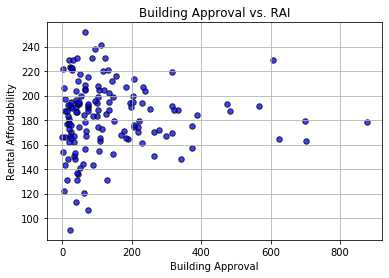

In [11]:
#Building Approval vs. RAI
plt.scatter(aff_df['yearly building_approval'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Building Approval vs. RAI")
plt.xlabel('Building Approval')
plt.ylabel('Rental Affordability')

plt.savefig("building_vs.RAI.png")
plt.show()

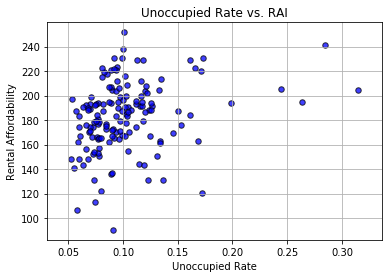

In [12]:
#Unoccupied vs. RAI



plt.scatter(aff_df['unoccupied_rate'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unoccupied Rate vs. RAI")
plt.xlabel('Unoccupied Rate')
plt.ylabel('Rental Affordability')

plt.savefig("Unoccupied Rate_vs.RAI.png")
plt.show()

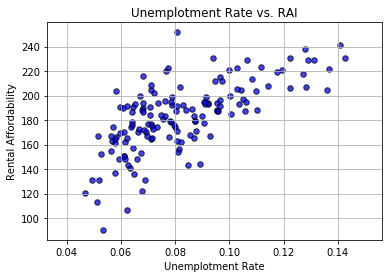

In [13]:
#Unemployment vs. RAI



plt.scatter(aff_df['unemployment_rate'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unemplotment Rate vs. RAI")
plt.xlabel('Unemplotment Rate')
plt.ylabel('Rental Affordability')

plt.savefig("Unemplotment Rate_vs.RAI.png")
plt.show()

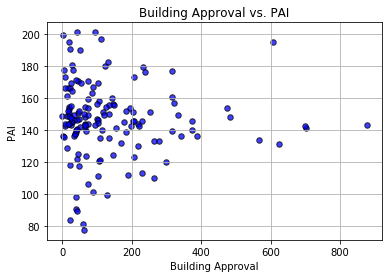

In [14]:
#Building Approval vs. PAI



plt.scatter(aff_df['yearly building_approval'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Building Approval vs. PAI")
plt.xlabel('Building Approval')
plt.ylabel('PAI')

plt.savefig("building_vs.PAI.png")
plt.show()

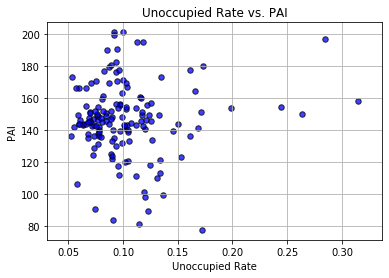

In [15]:
#Unoccupied vs. PAI



plt.scatter(aff_df['unoccupied_rate'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unoccupied Rate vs. PAI")
plt.xlabel('Unoccupied Rate')
plt.ylabel('PAI')

plt.savefig("Unoccupied Rate_vs.RAI.png")
plt.show()

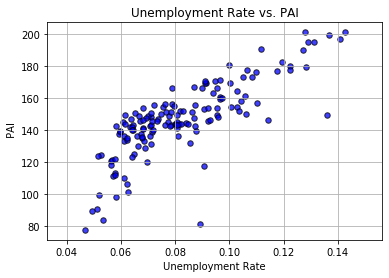

In [16]:
#Unemployment vs. PAI



plt.scatter(aff_df['unemployment_rate'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unemployment Rate vs. PAI")
plt.xlabel('Unemployment Rate')
plt.ylabel(' PAI')

plt.savefig("Unemployment Rate_vs.PAI.png")
plt.show()

In [17]:
#Linear Regression

def create_linear_regression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    print(f"The r-squared is: {rvalue}")

    plt.show()


The r-squared is: 0.02617817372113006


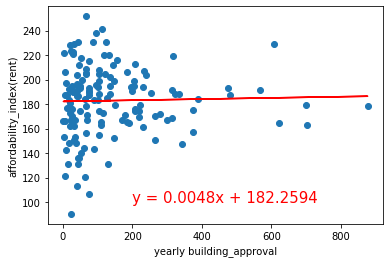

<Figure size 432x288 with 0 Axes>

In [18]:
xlbl = "yearly building_approval"
ylbl = "affordability_index(rent)"
lblpos = (200,100)

create_linear_regression(aff_df[xlbl],aff_df[ylbl],xlbl,ylbl,lblpos,5)

plt.savefig("linBR.png")

The r-squared is: -0.07243502943913793


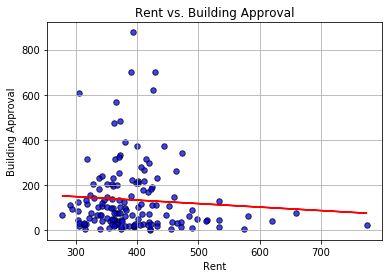

In [41]:


plt.scatter(aff_df['median_rent'],aff_df['yearly building_approval'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Rent vs. Building Approval")
plt.xlabel('Rent')
plt.ylabel('Building Approval')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(aff_df['median_rent'], aff_df['yearly building_approval'])
regress_values = aff_df['median_rent'] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.plot(aff_df['median_rent'],regress_values,"r-")
print(f"The r-squared is: {rvalue}")

plt.savefig("Rent vs. Building Approval.png")
plt.show()

The r-squared is: -0.6097101004803613


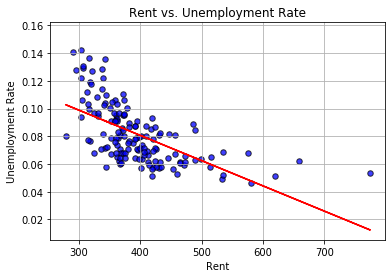

In [42]:


plt.scatter(aff_df['median_rent'],aff_df['unemployment_rate'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Rent vs. Unemployment Rate")
plt.xlabel('Rent')
plt.ylabel('Unemployment Rate')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(aff_df['median_rent'], aff_df['unemployment_rate'])
regress_values = aff_df['median_rent'] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.plot(aff_df['median_rent'],regress_values,"r-")
print(f"The r-squared is: {rvalue}")

plt.savefig("Rent vs. Unemployment Rate.png")
plt.show()

The r-squared is: -0.2240094892239574


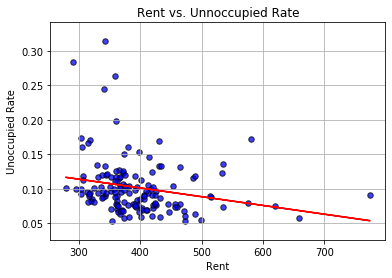

In [21]:

plt.scatter(aff_df['median_rent'],aff_df['unoccupied_rate'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Rent vs. Unnoccupied Rate")
plt.xlabel('Rent')
plt.ylabel('Unoccupied Rate')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(aff_df['median_rent'], aff_df['unoccupied_rate'])
regress_values = aff_df['median_rent'] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.plot(aff_df['median_rent'],regress_values,"r-")
print(f"The r-squared is: {rvalue}")

plt.savefig("Rent vs. Unoccupied Rate.png")
plt.show()

In [22]:

medrentmean = aff_df["median_rent"].mean()
medrentmedian = aff_df["median_rent"].median()
medrentvar = aff_df["median_rent"].var()
medrentstd = aff_df["median_rent"].std()
medrentsem = aff_df["median_rent"].sem()

#create datafram
df_medrentsummary = pd.DataFrame([[medrentmean,medrentmedian,medrentvar,medrentstd,medrentsem]], columns = ["Mean","Median","Var","Std","SEM"])

df_medrentsummary

,Mean,Median,Var,Std,SEM
0,393.216843,374.926193,5149.194974,71.757891,5.898462


In [48]:
df_rent = aff_df.loc[:,["SA2 Name","median_rent"]] 
    
# Determine outliers using upper and lower bounds
quartiles = df_rent["median_rent"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
meanq = quartiles[0.5]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
medrentmedian = aff_df["median_rent"].median()
medrentvar = aff_df["median_rent"].var()
medrentstd = aff_df["median_rent"].std()
medrentsem = aff_df["median_rent"].sem()
    
    
print(f"Median Rental Statistics")        
print(f"values above ${round(upper_bound, 2)} could be outliers")
print(f"The upper quartile for suburbs is: ${round(upperq, 2)}")
print(f"The the median for suburbs is: ${round(meanq, 2)} ")
print(f"The the variance for suburbs is: {round(medrentvar, 2)} ")
print(f"The the std dev for suburbs is: ${round(medrentstd, 2)} ")
print(f"The the SEM for suburbs is: {round(medrentsem, 2)} ")
print(f"The lower quartile for suburbs is: ${round(lowerq,2)}")
print(f"The interquartile range for suburbs is: ${round(iqr, 2)}")
print(f"values below ${round(lower_bound,2)} could be outliers")
for i, row in df_rent.iterrows():
    rent = row["median_rent"]
    suburb = row["SA2 Name"]
#     print(f"{suburb}: ${rent}")
    if (rent > upper_bound):
        print(f"A possible upper outlier is {suburb}: ${round(rent, 2)}")
    elif (rent < lower_bound):
        print(f"A possible lower outlier is {suburb}: ${round(rent, 2)}")
    
# print("")

Median Rental Statistics
values above $522.92 could be outliers
The upper quartile for suburbs is: $420.1
The the median for suburbs is: $374.93 
The the variance for suburbs is: 5149.19 
The the std dev for suburbs is: $71.76 
The the SEM for suburbs is: 5.9 
The lower quartile for suburbs is: $351.56
The interquartile range for suburbs is: $68.54
values below $248.74 could be outliers
A possible upper outlier is City Beach: $774.32
A possible upper outlier is Cottesloe: $580.22
A possible upper outlier is Floreat: $619.84
A possible upper outlier is Swanbourne - Mount Claremont: $533.78
A possible upper outlier is Iluka - Burns Beach: $658.33
A possible upper outlier is Ocean Reef: $533.84
A possible upper outlier is North Coogee: $533.82
A possible upper outlier is Winthrop: $575.0


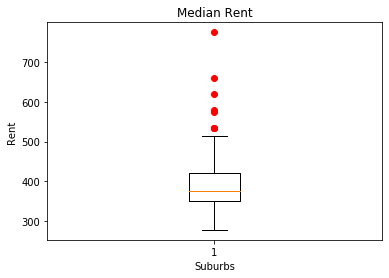

In [24]:
      
fig, ax = plt.subplots()
ax.boxplot(df_rent["median_rent"], sym="ro")
# ax.set_xticklabels("Suburbs")
ax.set_title("Median Rent")
# ax.set_ylim([0,80])
ax.set_ylabel("Rent")
ax.set_xlabel("Suburbs")
plt.savefig("Rent Box Plot.png")    
plt.show()


In [47]:
df_mortgage = aff_df.loc[:,["SA2 Name","median_mortgage_repayment"]] 
    
# Determine outliers using upper and lower bounds
quartiles = df_mortage["median_mortgage_repayment"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
meanq = quartiles[0.5]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
medmortgagemedian = aff_df["median_mortgage_repayment"].median()
medmortgagevar = aff_df["median_mortgage_repayment"].var()
medmortgagestd = aff_df["median_mortgage_repayment"].std()
medmortgagesem = aff_df["median_mortgage_repayment"].sem()
    
    
print(f"Median Mortgage Repayment Statistics")        
print(f"values above ${round(upper_bound,2)} could be outliers")
print(f"The upper quartile for suburbs is: ${round(upperq, 2)}")
print(f"The the median for suburbs is: ${round(meanq, 2)} ")
print(f"The the variance for suburbs is: {round(medmortgagevar, 2)} ")
print(f"The the std dev for suburbs is: ${round(medmortgagestd, 2)} ")
print(f"The the SEM for suburbs is: {round(medmortgagesem, 2)} ")
print(f"The lower quartile for suburbs is: ${round(lowerq,2)}")
print(f"The interquartile range for suburbs is: ${round(iqr, 2)}")
print(f"values below ${round(lower_bound,2)} could be outliers")
for i, row in df_mortgage.iterrows():
    rent = row["median_mortgage_repayment"]
    suburb = row["SA2 Name"]
    if (rent > upper_bound):
        print(f"A possible upper outlier is {suburb}: ${round(rent, 2)}")
    elif (rent < lower_bound):
        print(f"A possible lower outlier is {suburb}: ${round(rent, 2)}")
    


Median Mortgage Repayment Statistics
values above $603.19 could be outliers
The upper quartile for suburbs is: $510.05
The the median for suburbs is: $480.05 
The the variance for suburbs is: 8665.46 
The the std dev for suburbs is: $93.09 
The the SEM for suburbs is: 7.65 
The lower quartile for suburbs is: $447.96
The interquartile range for suburbs is: $62.09
values below $354.83 could be outliers
A possible upper outlier is City Beach: $838.98
A possible upper outlier is Claremont (WA): $636.53
A possible upper outlier is Cottesloe: $902.74
A possible upper outlier is Floreat: $770.72
A possible upper outlier is Mosman Park - Peppermint Grove: $715.65
A possible upper outlier is Nedlands - Dalkeith - Crawley: $863.32
A possible upper outlier is Swanbourne - Mount Claremont: $782.31
A possible upper outlier is Subiaco - Shenton Park: $618.02
A possible upper outlier is Iluka - Burns Beach: $660.95
A possible upper outlier is Trigg - North Beach - Watermans Bay: $629.04
A possible up

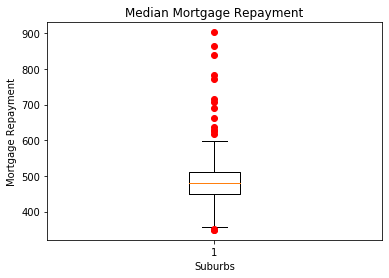

In [46]:
      
fig, ax = plt.subplots()
ax.boxplot(df_mortgage["median_mortgage_repayment"], sym="ro")
# ax.set_xticklabels("Suburbs")
ax.set_title("Median Mortgage Repayment")
# ax.set_ylim([0,80])
ax.set_ylabel("Mortgage Repayment")
ax.set_xlabel("Suburbs")
plt.savefig("Mortgage Repayment Plot.png")    
plt.show()
